# PS3- Sentiment Analysis on product reviews

By **Devendra Kumar**



Sentiment Classifiers ideally require a lot of data. Here however I have a very small dataset. Due to this, I are using the entire dataset for training. The 130 reviews of test data have been manually labelled by us according to our judgement of the review. We may be wrong as I lack domain specific knowledge. However, in order to test the model, this works well. 
As dataset is small, I aim for a very high accuracy **(atleast 95%)** on training data, and **atleast a 70% accuracy** on test data (manually labelled test).

To analyze unstructured text data, I first converted it into a **Term Frequency- Inverse Document Frequency Matrix (TF-IDF Matrix)**. We have tried many algorithms used for classification- MLP, Logistic Regression, SVM, Decision trees etc.

In the end the Random Forest classifier emerged as the winner among all these.

**Important** : The predictions I have submitted are the ones given by the best model that I have trained, not the manually labelled test data used as validation data in the below algorithms

## Table of Contents:
* [Importing Libraries](#first-bullet)
* [Loading the dataset](#eleventh-bullet)
* [Cleaning the text](#second-bullet)
* [Lemmatization of reviews](#third-bullet)
* [Creating TF-IDF matrix](#fourth-bullet)
* [Vader Score Analysis](#twelfth-bullet)
* [Multi-layer Perceptron](#fifth-bullet)
* [Logistic Regression](#sixth-bullet)
* [SVM classifier](#seventh-bullet)
* [Decision Tree Classifier](#eighth-bullet)
* [Random Forest Classifier](#ninth-bullet)
* [XGBoost Classifier](#tenth-bullet)
* [Conclusion](#thirteenth-bullet)
* [Summary of negative reviews](#fourteenth-bullet) 




## Importing libraries <a class="anchor" id="first-bullet"></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import sklearn

In [ ]:
import tensorflow as tf

## Loading dataset <a class ='anchor' id="eleventh-bullet"></a>

In [ ]:
df = pd.read_excel('train_ps3.xlsx')

In [ ]:
df

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
df.describe()

,Sentiment (1=Positive & 0= Negative)
count,387.000000
mean,0.449612
std,0.498099
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
print('The proportion of positive examples is: '+ str(df.loc[df.iloc[:,3]==1].shape[0]/df.shape[0]))
print('The proportion of negative examples is: '+ str(df.loc[df.iloc[:,3]==0].shape[0]/df.shape[0]))

The proportion of positive examples is: 0.4496124031007752
The proportion of negative examples is: 0.5503875968992248


The dataset is skewed negatively. This is a disadvantage that may impact the F1 score

In [ ]:
unique_job_roles = (df.iloc[:,1].unique())

In [ ]:
ar = unique_job_roles

In [ ]:
roles = {}
i = 0
for role in ar:
    roles[role] = i
    i+=1

In [ ]:
add_on = np.zeros((387,55))
for i in range(387):
    add_on[i,roles[df.iloc[i,1]]] = 1

In [ ]:
add_on_test = np.zeros((130,55))
for i in range(130):

    if test.iloc[i,1] in roles:
        add_on_test[i,roles[test.iloc[i,1]]] = 1
        
    

In [ ]:
add_on_test.shape

(130, 55)

In [ ]:
reviews  = df.iloc[:,2]

In [ ]:
sentiments = df.iloc[:,3]

In [ ]:
X = reviews.copy(deep = True)
Y = sentiments.copy(deep = True)

In [ ]:
test = pd.read_excel('test_ps3.xlsx')

In [ ]:
test

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,DX,Operations,software releases are always late. Customer-fa...,0
1,DX,Architect,documantation is wrong,0
2,DX,Sales Specialist,Nice platform- well managed- not perfect-,1
3,DX,Architect,lack of features,0
4,DX,Sales Specialist,Very good Support from BU,1
...,...,...,...,...
125,DX,Engineer - Consultant [C],Nice price/performance.\n,1
126,DX,Support,This product is a big change will make more cu...,1
127,DX,Manager,Insufficient troubleshooting capabilities and ...,0
128,DX,Engineer - Consultant [C],"Its interesting,",1


In [ ]:
reviews_test = test.iloc[:,2]
sentiments_test = test.iloc[:,3]

After loading the libraries and the dataset, we assign the sentences to X and the sentiment value to Y

## Cleaning the text  <a class ='anchor' id="second-bullet"></a>

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
stopwords.remove('not')
stopwords.remove('no')

In [ ]:
def cleaner(sents):
    ''' This function performs basic text cleaning - lower-casing, removing punctuations, and verb contractions. It also removes stopwords loaded from nltk 
    Input is a list of sentences and Output is a list of the cleaned sentences'''
    
    sents = [x.lower() for x in sents]
    out = []
    for sent in sents:
        clean_words = []
        l = sent.split()
        for word in l:
            if word == "isn't":
                word = 'is not'
            if word == "can't":
                word = 'cannot'
            if word == "won't":
                word = 'will not'
            if word == "shouldn't":
                word = 'should not'
            if word == "aren't":
                word = 'are not'
            if word == "couldn't":
                word = 'could not'
            if word == "didn't":
                word = 'did not'
            if word == "it's":
                word = 'it is'
            if word == "i've":
                word = "i have"
            if word == "we've":
                word = 'we have'
            if word == "hadn't":
                word = 'had not'
            if word == "weren't":
                word = 'were not'
            if word in stopwords:
                word = ''
            
            clean_words.append(word)
        out.append(' '.join(clean_words))

    out1 = []
    for sent in out:
        s = sent
        if '\n' in sent:
            s = sent.replace('\n','.')
        out1.append(s)

    out2 = []
    for sent in out1:
        s = sent
        for char in '.?/\|,:;)-_(':
            if char in sent:
            
                s = sent.replace(char,' ')
        
        out2.append(s)
            
    return out2
    

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
X = cleaner(X)

In [ ]:
reviews_test = cleaner(reviews_test)

In [ ]:
X

['no maintenance menu',
 'buggy',
 'high quality standards',
 'features missing',
 'inter working',
 'high price pre aggregation role',
 'not much deployed',
 'overall throughput constrained',
 'feels like product step child concerned gone shortly',
 'problem always constant',
 'great upgrade',
 'improve overall keep good work',
 'no issues observed',
 'ongoing issues far  issues reported far customer',
 'many bugs make difficult determine whether software hardware',
 'lacks documentation unsupported features features combinations',
 'no partner maintenance menu',
 "sw quality low cannot meet customer's expectation ",
 'high quality standards',
 'missing feat support newer router build',
 'great feature adoption product versatility',
 'weakness cab requirements',
 'many miss alignment code issue',
 'waiting time security feature set',
 'easy implement',
 'great product advantageous compared competitors however encountering performance issues throughput sometimes',
 'many models similar

## Lemmatization of reviews  <a class ='anchor' id="third-bullet"></a>

In [ ]:
X_lemmatized =[(' '.join([lemmatizer.lemmatize(word, pos = 'a')for word in x.split()])) for x in X]
X_lemmatized = [(' '.join([lemmatizer.lemmatize(word, pos = 'v')for word in x.split()])) for x in X]
X_lemmatized = [(' '.join([lemmatizer.lemmatize(word, pos = 'n')for word in x.split()])) for x in X]

In [ ]:
X_lemmatized

['no maintenance menu',
 'buggy',
 'high quality standard',
 'feature missing',
 'inter working',
 'high price pre aggregation role',
 'not much deployed',
 'overall throughput constrained',
 'feel like product step child concerned gone shortly',
 'problem always constant',
 'great upgrade',
 'improve overall keep good work',
 'no issue observed',
 'ongoing issue far issue reported far customer',
 'many bug make difficult determine whether software hardware',
 'lack documentation unsupported feature feature combination',
 'no partner maintenance menu',
 "sw quality low cannot meet customer's expectation",
 'high quality standard',
 'missing feat support newer router build',
 'great feature adoption product versatility',
 'weakness cab requirement',
 'many miss alignment code issue',
 'waiting time security feature set',
 'easy implement',
 'great product advantageous compared competitor however encountering performance issue throughput sometimes',
 'many model similar term interface',


In [ ]:
reviews_test_lemmatized =[(' '.join([lemmatizer.lemmatize(word, pos = 'a')for word in x.split()])) for x in reviews_test]
reviews_test_lemmatized = [(' '.join([lemmatizer.lemmatize(word, pos = 'v')for word in x.split()])) for x in reviews_test]
reviews_test_lemmatized = [(' '.join([lemmatizer.lemmatize(word, pos = 'n')for word in x.split()])) for x in reviews_test]

## Creating a Tf-Idf matrix  <a class ='anchor' id="fourth-bullet"></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features= 300)

In [ ]:
X_tfidf = vectorizer.fit_transform(X_lemmatized)

In [ ]:
X_tfidf = X_tfidf.toarray()

In [ ]:
X_test= vectorizer.transform(reviews_test_lemmatized)
X_test = np.array(X_test.toarray())

In [ ]:
new_tfidf = np.concatenate((X_tfidf,add_on), axis = 1)

In [ ]:
word_features = vectorizer.get_feature_names_out()

In [ ]:
word_features #These are the words being measured for the Tf-Idf matrix

array(['accounting', 'address', 'aggregation', 'also', 'always',
       'amazing', 'another', 'basic', 'become', 'behavior', 'behind',
       'best', 'better', 'box', 'bug', 'buggy', 'cab', 'cannot',
       'capability', 'case', 'cases', 'cause', 'centralized', 'challenge',
       'change', 'checking', 'clear', 'cli', 'close', 'combination',
       'come', 'compared', 'comparing', 'competition', 'competitive',
       'competitor', 'complicated', 'concerned', 'considered',
       'consistent', 'constant', 'constantly', 'continue', 'cost',
       'costly', 'critical', 'customer', 'deal', 'debugability', 'defect',
       'defective', 'defined', 'delay', 'delayed', 'delivery', 'deploy',
       'detail', 'determine', 'development', 'device', 'different',
       'difficult', 'dimensional', 'dissatisfaction', 'doc', 'document',
       'documentation', 'documented', 'downgrade', 'drop', 'dropped',
       'due', 'effective', 'engineering', 'enginieering', 'established',
       'even', 'everythi

## Vader score analysis <a class ='anchor' id="twelfth-bullet"></a>

Vader Score is a sentiment classifier provided in the nltk library. It is a reliable algorithm for sentiment analysis in many situations so it is good to start with using it as a sentiment classifier in this situation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
def get_vader_score(sent):
    '''Function calculates the vader score for a sentence. Input is a string (sentence) and output is a score (integer)'''
    tokenized = sent
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(tokenized)['compound']

In [ ]:
def sentiment_predictor(sentences):
    '''Uses vader score to predict the sentiment of reviews. Input is a list of reviews and output is a list of sentiments'''
    pred = []
    for sent in sentences:
        if get_vader_score(sent) > 0:
            pred.append(1)
        else:
            pred.append(0)
    return pred
   

In [ ]:
accuracy_score(sentiment_predictor(reviews), sentiments)

0.7338501291989664

In [ ]:
accuracy_score(sentiment_predictor(reviews_test), sentiments_test)

0.7692307692307693

Vader score does better on test than training data, this could mean that the training dataset contains many domain-specific reviews that VADER is unable to judge correctly.

## Multi-layer Perceptron  <a class ='anchor' id="fifth-bullet"></a>

We are defining a model with three hidden layers of sizes 200, 150 and 50 respectively. We have used Dropout layers in between to reduce overfitting. The keras Sequential API has been used to create the model.\
We optimize this model to reduce the Binary Cross entropy loss using Adam optimizer. We have trained the model for 50 epochs and also kee track of validation accuracy during training. Due to the small dataset, the model is unstable and thus me add a Callback to stop training when train accuracy is > 95% and validation accuracy > 72%

In [ ]:
simple_model = tf.keras.Sequential([tf.keras.layers.InputLayer((300,)),tf.keras.layers.Dense(200,activation ='relu'),tf.keras.layers.Dropout(rate = 0.4), tf.keras.layers.Dense(100,activation ='relu'),tf.keras.layers.Dropout(rate = 0.3),tf.keras.layers.Dense(units = 50, activation = 'relu'),tf.keras.layers.Dropout(rate = 0.2),tf.keras.layers.Dense(units = 30, activation = 'relu'),tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

In [ ]:
new_test = np.concatenate((X_test, add_on_test), axis =1)

In [ ]:
simple_model.compile(loss = 'BinaryCrossentropy',metrics = ['accuracy'],optimizer = 'Adam')
from keras.callbacks import ModelCheckpoint

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy')>=0.72):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.95*100))   
            self.model.stop_training = True

In [ ]:
hist = simple_model.fit(X_tfidf, sentiments, epochs = 50, validation_data= [X_test, sentiments_test], callbacks = [myCallback()])

Epoch 1/50
13/13 [==============================] - 4s 31ms/step - loss: 0.6927 - accuracy: 0.4987 - val_loss: 0.6778 - val_accuracy: 0.7154
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6850 - accuracy: 0.5814 - val_loss: 0.6526 - val_accuracy: 0.7000
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6613 - accuracy: 0.5633 - val_loss: 0.6166 - val_accuracy: 0.7308
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6512 - val_loss: 0.5634 - val_accuracy: 0.7692
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 0.5173 - accuracy: 0.8114 - val_loss: 0.4854 - val_accuracy: 0.8000
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.3900 - accuracy: 0.8734 - val_loss: 0.4569 - val_accuracy: 0.7385
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.3066 - accuracy: 0.8811 - val_loss: 0.5383 - val_accuracy: 0.7154
Epoch 8/50
13/13 [=

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
train_pred= np.round(simple_model.predict(X_tfidf))


13/13 [==============================] - 0s 3ms/step


In [ ]:
confusion_matrix(train_pred, sentiments)

array([[199,   2],
       [ 14, 172]], dtype=int64)

In [ ]:
pred = np.round(simple_model.predict(X_test))


5/5 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(pred,sentiments_test)

0.7307692307692307

In [ ]:
confusion_matrix((pred),sentiments_test)

array([[62,  7],
       [28, 33]], dtype=int64)

We also try a deeper neural network of 4 hidden layer of sizes 200,150,100,50 respectively. But the performance does not improve.

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.InputLayer((300,)),tf.keras.layers.Dense(200,activation ='relu'),tf.keras.layers.Dropout(rate = 0.7), tf.keras.layers.Dense(150,activation ='relu'),tf.keras.layers.Dropout(rate = 0.5),tf.keras.layers.Dense(units = 100, activation = 'relu'),tf.keras.layers.Dropout(rate = 0.4),tf.keras.layers.Dense(50,activation ='relu'),tf.keras.layers.Dropout(rate = 0.2), tf.keras.layers.Dense(30,activation ='relu'),tf.keras.layers.Dropout(rate = 0.1),tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

In [ ]:
model2.compile(loss = 'BinaryCrossentropy',metrics= ['accuracy'], optimizer = 'Adam')

In [ ]:
hist2 = model2.fit(X_tfidf, sentiments, validation_data = [X_test, sentiments_test], epochs = 50)

Epoch 1/50
13/13 [==============================] - 3s 40ms/step - loss: 0.6951 - accuracy: 0.4651 - val_loss: 0.6833 - val_accuracy: 0.6923
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6884 - accuracy: 0.5814 - val_loss: 0.6754 - val_accuracy: 0.6923
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6893 - accuracy: 0.5349 - val_loss: 0.6748 - val_accuracy: 0.6923
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6881 - accuracy: 0.5426 - val_loss: 0.6706 - val_accuracy: 0.6923
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.6816 - accuracy: 0.5685 - val_loss: 0.6620 - val_accuracy: 0.6923
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6791 - accuracy: 0.5556 - val_loss: 0.6477 - val_accuracy: 0.6923
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.5659 - val_loss: 0.6337 - val_accuracy: 0.7077
Epoch 8/50
13/13 

The Multilayer Perceptron model is not useful in this dataset as the dataset is very small. The model also attains desirably high training accuracy in the initial 50 epochs and subsequent training stabilizes this accuracy but at the same time it reduces the test accuracy. Thus we have not trained the model for more than 50 epochs.

Due to the paucity of data, we are not applying advanced NLP models like RNNs and attention models

## Logistic Regression  <a class ='anchor' id="sixth-bullet"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
regressor = LogisticRegression()

In [ ]:
model3 = regressor.fit(X_tfidf, sentiments)

In [ ]:
pred = model3.predict(X_tfidf)

In [ ]:
accuracy_score(pred, sentiments)

0.9018087855297158

In [ ]:
pred_test = model3.predict(X_test)
accuracy_score(pred_test, sentiments_test)

0.7538461538461538

Logistic Regression predictably is not a great choice for this dataset because it works best on linearly separable datasets. However the test accuracy is still quite good, better than MLP. Again and again the algorithms indicate that testing data is actually more easily classifiable than training in our case

## SVM classifier<a class ='anchor' id="seventh-bullet"></a>

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel = 'rbf')

In [ ]:
X_tfidf.shape

(387, 300)

In [ ]:
model4 = classifier.fit(X_tfidf, sentiments)

In [ ]:
pred4 = model4.predict(X_tfidf)

In [ ]:
accuracy_score(pred4, sentiments)

0.9560723514211886

In [ ]:
pred_test4 = model4.predict(X_test)

In [ ]:
accuracy_score(pred_test4, sentiments_test)

0.7692307692307693

In [ ]:
confusion_matrix(pred_test4, sentiments_test)

array([[71, 11],
       [19, 29]], dtype=int64)

SVM with RBF kernel works very well. We also tried polynomial kernels with degrees higher than 10 but they did not seem to work better than this.

The only drawback of SVM classification is that it is not easy to interpret. For instance, we cannot get the probability of an example being positive or negative, we only get a binary score

## Decision Tree classifier  <a class ='anchor' id="eighth-bullet"></a>

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 50)
model5 = clf.fit(X_tfidf, sentiments)

In [ ]:
pred5 = model5.predict(X_tfidf)

In [ ]:
accuracy_score(pred5, sentiments)

0.9638242894056848

In [ ]:
accuracy_score(model5.predict(X_test),sentiments_test)

0.7307692307692307

One simple decision tree is unable to achieve a good testing accuracy

## Random Forest classifier <a class ='anchor' id="ninth-bullet"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth= 45, random_state=0)

In [ ]:
new_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model6 = clf.fit(X_tfidf, sentiments)

In [ ]:
accuracy_score(model6.predict(X_tfidf), sentiments)

0.9534883720930233

In [ ]:
new_test.shape

(130, 355)

In [ ]:
accuracy_score(model6.predict(X_test), sentiments_test)

0.7769230769230769

In [ ]:
confusion_matrix(model6.predict(X_tfidf), sentiments)

array([[209,  14],
       [  4, 160]], dtype=int64)

In [ ]:
confusion_matrix(model6.predict(X_test), sentiments_test)

array([[75, 14],
       [15, 26]], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print('f1_score on training data is:'+str(f1_score(model6.predict(X_tfidf), sentiments)))

f1_score on training data is:0.9467455621301775


In [ ]:
print('f1_score on testing data is:'+str(f1_score(model6.predict(X_test), sentiments_test)))

f1_score on testing data is:0.6419753086419754


In [ ]:
model6.predict_proba(X_test)

array([[0.67620749, 0.32379251],
       [0.71706948, 0.28293052],
       [0.3611791 , 0.6388209 ],
       [0.9734003 , 0.0265997 ],
       [0.33945374, 0.66054626],
       [0.58564178, 0.41435822],
       [0.71706948, 0.28293052],
       [0.71706948, 0.28293052],
       [0.06371903, 0.93628097],
       [0.10780255, 0.89219745],
       [0.88719561, 0.11280439],
       [0.36505405, 0.63494595],
       [0.71706948, 0.28293052],
       [0.74653818, 0.25346182],
       [0.66003501, 0.33996499],
       [0.67664774, 0.32335226],
       [0.90827296, 0.09172704],
       [0.60135833, 0.39864167],
       [0.72619476, 0.27380524],
       [0.58334693, 0.41665307],
       [0.16588188, 0.83411812],
       [0.25250196, 0.74749804],
       [0.60135833, 0.39864167],
       [0.7762017 , 0.2237983 ],
       [0.70214728, 0.29785272],
       [0.67513879, 0.32486121],
       [0.88201433, 0.11798567],
       [0.4472005 , 0.5527995 ],
       [0.55112809, 0.44887191],
       [0.75227607, 0.24772393],
       [0.

In [ ]:
imp_words = model6.feature_importances_

In [ ]:
ind = imp_words.argsort()[200:]

In [ ]:
word_features[ind]

array(['feel', 'getting', 'required', 'far', 'gap', 'release', 'included',
       'long', 'continue', 'project', 'seen', 'troubleshoot', 'effective',
       'nice', 'like', 'one', 'low', 'winning', 'waiting', 'recently',
       'behavior', 'strong', 'compared', 'deal', 'consistent',
       'licensing', 'team', 'use', 'competitor', 'competitive',
       'engineering', 'clear', 'experience', 'oriented', 'delivery',
       'scalable', 'network', 'defined', 'upgrade', 'fixed',
       'complicated', 'software', 'pricing', 'menu', 'implement', 'case',
       'improved', 'value', 'new', 'satisfied', 'multi', 'roadmap',
       'slow', 'stable', 'little', 'written', 'overall', 'set', 'similar',
       'fine', 'working', 'standard', 'money', 'high', 'buggy',
       'hardware', 'model', 'price', 'lot', 'better', 'varied', 'best',
       'scale', 'platform', 'box', 'problem', 'service', 'documentation',
       'expected', 'quality', 'work', 'document', 'outcome', 'need',
       'missing', 'result'

We varied the parameters of the Random Forest and in the end, Random forest of 100 trees, each with a maximum depth of 50 performs very well, at par with SVM. Random forest is also a very interpretable algorithm and training an RF Classifier gives us a probabilistic estimate of Sentiment of each review. We can also isolate the top 50 or top 100 features (here words) that are most significant in a review, according to the classifier.\
Predictably these contain words like *'good'*, *'lack'* and *'bug'*.

## XGBoost classifier  <a class ='anchor' id="tenth-bullet"></a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xgbclassifier = GradientBoostingClassifier(n_estimators = 250,max_depth = 45, random_state = 0)

In [ ]:
model7 = xgbclassifier.fit(X_tfidf, sentiments)

In [ ]:
confusion_matrix(model7.predict(X_tfidf),sentiments)

array([[201,   1],
       [ 12, 173]], dtype=int64)

In [ ]:
print('accuracy_score on training data is:'+str(accuracy_score(model7.predict(X_tfidf),sentiments)))

accuracy_score on training data is:0.9664082687338501


In [ ]:
confusion_matrix(model7.predict(X_test),sentiments_test)

array([[68,  6],
       [22, 34]], dtype=int64)

In [ ]:
print('accuracy_score on testing data is:'+str(accuracy_score(model7.predict(X_test),sentiments_test)))

accuracy_score on testing data is:0.7846153846153846


In [ ]:
print('f1_score on training data is :' + str(f1_score(model7.predict(X_tfidf),sentiments)))

f1_score on training data is :0.9637883008356545


In [ ]:
print('f1_score on testing data is :' + str(f1_score(model7.predict(X_test),sentiments_test)))

f1_score on testing data is :0.7083333333333333


In [ ]:
model7.predict_proba(X_test)[:10]

array([[9.68381864e-01, 3.16181362e-02],
       [4.00002861e-01, 5.99997139e-01],
       [7.90313005e-02, 9.20968699e-01],
       [9.99999995e-01, 5.12586089e-09],
       [4.99999695e-01, 5.00000305e-01],
       [2.29594146e-01, 7.70405854e-01],
       [4.00002861e-01, 5.99997139e-01],
       [4.00002861e-01, 5.99997139e-01],
       [4.91456431e-10, 1.00000000e+00],
       [3.18479533e-08, 9.99999968e-01]])

In [ ]:
prediction_sol = pd.DataFrame({'prediction':model7.predict(X_test)})

In [ ]:
train_pred = pd.DataFrame({'prediction':model7.predict(X_tfidf)})

In [ ]:
prediction_sol

,prediction
0,0
1,1
2,1
3,0
4,1
...,...
125,1
126,0
127,0
128,1


In [ ]:
prediction_sol.to_csv('test_sol.csv')

In [ ]:
train_pred.to_csv('train_sol.csv')

In [ ]:
imp_words_xgb = model7.feature_importances_

In [ ]:
ind_xgb = imp_words_xgb.argsort()[250:]

In [ ]:
print('These are the 50 most significant words in a review:',str(word_features[ind_xgb]))

These are the 50 most significant words in a review: ['documentation' 'high' 'scalable' 'set' 'hardware' 'need' 'winning'
 'defined' 'implement' 'gap' 'network' 'platform' 'roadmap' 'fixed' 'one'
 'team' 'behavior' 'service' 'stable' 'model' 'getting' 'little'
 'continue' 'feature' 'fine' 'similar' 'varied' 'written' 'box' 'missing'
 'better' 'price' 'outcome' 'document' 'expected' 'best' 'result'
 'product' 'scale' 'customer' 'no' 'support' 'excellent' 'great' 'not'
 'well' 'issue' 'lack' 'many' 'good']


As expected, the main words include *'good'*, *'issue'* and *'lack'*. XGBoost does not outperform Random Forest on testing data. However, it does better on training data.

## Conclusion <a class = 'anchor' id = 'thirteenth-bullet'></a>

Thus the best model is **XGBoost Model**. However, because  [XGBoost Classifier](#tenth-bullet) is more interpretable and tweakable, we prefer to submit its predictions on the unlabelled test data

## Summary of negative reviews <a class = 'anchor' id = 'fourteenth-bullet'></a>

There are three products in the dataset - IX,QK and DX

In [ ]:
df.iloc[:,0].unique()

array(['IX', 'QK', 'DX'], dtype=object)

In [ ]:
ix_reviews = df.loc[df.iloc[:,0]=='IX']

In [ ]:
ix_neg = ix_reviews.loc[ix_reviews.iloc[:,3]==0]

In [ ]:
ix_neg_text = ix_neg.iloc[:,2]

In [ ]:
ix_neg_text = ' '.join(cleaner(ix_neg_text.tolist()))

In [ ]:
ix_neg_text

'  no maintenance menu  buggy  features missing     inter working high price  pre aggregation role not much deployed overall throughput constrained feels like  product   step child  concerned    gone shortly  problem  always  constant   ongoing issues  far few issues reported  far  customer    many bugs  make  difficult  determine whether   software  hardware lacks  documentation  unsupported features  features combinations  not price competitive   market  pre-agg role) low product quality   many troubles  upgrading   many basic defects  hw although  solves  customer challenges  provides  solution   not  cost effective solution   many bugstoo many bugs lack  basic features   lot  bugs   many glitches  many   bugs    low level   poor drop accounting  troubleshooting capabilities  support  pretty much guess work  relying   boxes   network  provide  missing clues  difficulties  troubleshooting  silent reload type issue  think   still bugs     considered lack  testing   software  hardware 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
wordcloud_ix = WordCloud(stopwords = []).generate_from_text(ix_neg_text)

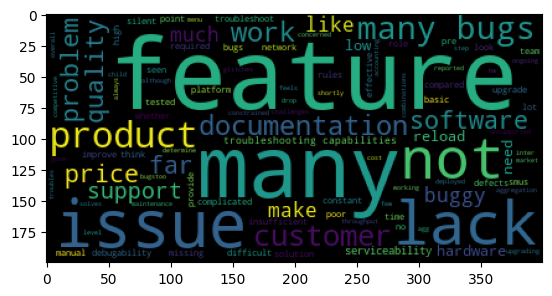

In [ ]:
plt.imshow(wordcloud_ix)

The product IX does not have good documentation, it lacks quality features and there are many bugs in it

In [ ]:
dx_reviews = df.loc[df.iloc[:,0]=='DX']

In [ ]:
dx_neg = dx_reviews.loc[dx_reviews.iloc[:,3]==0]

In [ ]:
dx_neg_text = dx_neg.iloc[:,2]

In [ ]:
dx_neg_text = ' '.join(cleaner(dx_neg_text.tolist()))

In [ ]:
dx_neg_text

' isno partner maintenance menu  experience    problem  issues software quality issues missing evolution path new features  back  forth even  not significant changes weakness  cab requirements story  missing minimum requirements   dialed  things like lack  xyz   challenge sometimes  challenge  implement documentation  not  clear  it different hw  different features  even clis  usually put    documentation   quality   documentation  constantly falling behind  feel   need    competitive  price  executive lead times; error documentation  misleading  resulting  feature gap) false positive   compliance  potential software upgrade rejection  lack  several features  buggy   need  long  close issues  timing slow  inconsistent validation scaling issuesissues  scale  put license cannot  shared    hardware documents incomplete   hardly  tools  help troubleshoot  issue   platform    heard  folks    costly box  limited feature set. nowadays experiencing lot  issues    harder  troubleshoot   disadva

In [ ]:
wordcloud_dx = WordCloud(stopwords = []).generate_from_text(dx_neg_text)

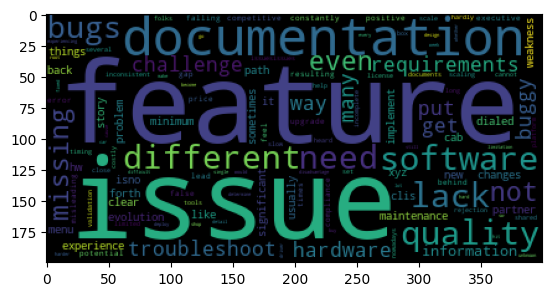

In [ ]:
plt.imshow(wordcloud_dx)

In DX product the issues are missing or insufficientfeatures, bad documentation and many bugs

In [ ]:
qk_reviews = df.loc[df.iloc[:,0]=='QK']

In [ ]:
qk_neg = qk_reviews.loc[qk_reviews.iloc[:,3]==0]

In [ ]:
qk_neg_text = qk_neg.iloc[:,2]

In [ ]:
qk_neg_text = ' '.join(cleaner(qk_neg_text.tolist()))

In [ ]:
qk_neg_text

"  no partner maintenance menu sw quality   low   cannot meet  customer's expectation. missing feat support   newer router build weakness  cab requirements   many miss alignment  code issue missing features  quality   documentation  constantly falling behind need  fix supply chain  twelve month lead times  killing us  moderate service quality low product quality multiple technical  hw issues multiple timing  system upgrade issues slow  inconsistent executive lead times slow no information      inter working  image   certain customer getting angry   regular basis services features  rather slow   heard  folks    costly box  limited feature set. provide  parity compared  xyz lots  bugs silent reload issuessilent reload issues   cannot apply workaround   many bugs  make  difficult  determine whether   software  hardwaret software quality  not good   many bugs it is  unstable  general  port issues  hard  explain  behavior  smart licensing     lot  bad issues many test  realetd  failures bet

In [ ]:
wordcloud_qk = WordCloud(stopwords = []).generate_from_text(qk_neg_text)

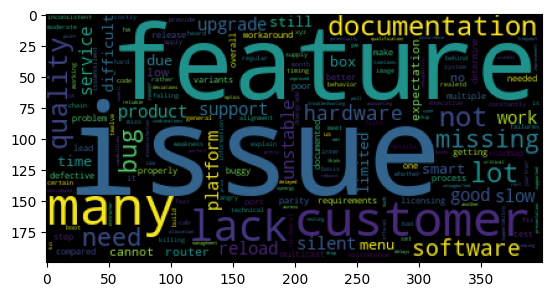

In [ ]:
plt.imshow(wordcloud_qk)

The QK product again has insufficient features, bad documentation and software and hardware problems. The customers is reporting many issues

**Summary**

The three products have three main issues:
1. Lack of important features and bad quality of features
2. Bad documentation
3. Many bugs
